# Importations

In [8]:
%time

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 4.05 µs


In [5]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import plotly.express

# Creating the model for Family

## Creating the DataFrames

In [6]:
#creating the dataframes

df_sales = pd.read_csv("gs://business-case/train.csv")
df_stores = pd.read_csv("gs://business-case/stores.csv")
sales_and_stores = pd.merge(df_sales, df_stores, on='store_nbr') #check if exists



In [13]:
#making it in the patter of
sales_and_stores = pd.read_parquet("../data_train_merge_stores.parquet").rename(columns={'date': 'ds', 'sales':'y'}).drop(columns=["month", "year", "city"])

In [15]:
sales_and_stores

,ds,store_nbr,family,y
0,2013-01-01,1,AUTOMOTIVE,0.000
1,2013-01-01,1,BABY CARE,0.000
2,2013-01-01,1,BEAUTY,0.000
3,2013-01-01,1,BEVERAGES,0.000
4,2013-01-01,1,BOOKS,0.000
...,...,...,...,...
2596369,2016-12-31,9,POULTRY,687.853
2596370,2016-12-31,9,PREPARED FOODS,100.405
2596371,2016-12-31,9,PRODUCE,3091.356
2596372,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000


## Defining the function for families

In [17]:
%%time
def family(sales_and_stores):

    forecasts = {}
    for category in sales_and_stores['family'].unique():
        print(category)
        # creating a new variable
        tmp_df_prep = sales_and_stores[sales_and_stores['family']== category]
        
        # Transforming the column in date time
        tmp_df_prep['ds'] = pd.to_datetime(tmp_df_prep['ds'])
 
        # creating a temporary df to the the training and prediction
        tmp_df = tmp_df_prep.groupby(by='ds').sum().drop(columns=["store_nbr"]).reset_index()
        
        
        # defining the train/test 
        train = tmp_df.iloc[:1457]
        test = tmp_df.iloc[1458:]
        
        
        # Instantiating the FB Prophet model
        model = Prophet(seasonality_mode='multiplicative')

        # fitting the model on the train test
        model.fit(train)
        
        forecasts[category]= model
    
    return forecasts

model_family = family(sales_and_stores)


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


AUTOMOTIVE


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


BABY CARE
Initial log joint probability = -33.4819
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3064.93    0.00108983       220.725      0.6891      0.6891      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199          3068    0.00325734       69.9098      0.5445      0.5445      238   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217       3068.17   0.000209139       117.928   2.155e-06       0.001      299  LS failed, Hessian reset 
     299       3068.78     0.0026569       85.4083           1           1      400   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     305       3068.81   0.000177529       86.5571   2.396e-06       0.001      451  LS failed, Hessian reset 
     365        3068.9   8.34357e-06       47.6359   1.026e-07       0.001      569  LS failed, He

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


BEAUTY
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3924.95    0.00115332       156.102      0.2528      0.8177      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3930.17    0.00270054       251.719           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3931.24   9.09405e-05        71.964           1           1      383   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     396       3931.94   0.000154513       161.385    1.87e-06       0.001      540  LS failed, Hessian reset 
     399       3932.01   0.000679418       146.964           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3932.59   2.32064e-05        39.313           1           1

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -10.5265
BEVERAGES
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3571.56    0.00513538       98.6646       1.439      0.1439      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3576.57     0.0079806       190.916       1.881      0.1881      245   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       3577.51    0.00112068        254.87   7.372e-06       0.001      287  LS failed, Hessian reset 
     299       3577.71   8.24978e-06       76.5467      0.3825      0.3825      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       3577.71   1.80039e-07       70.3952      0.4146      0.4146      454   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -21.526
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2709.97    0.00233284       114.287      0.4181      0.4181      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       2713.99   0.000402172       134.717   3.302e-06       0.001      263  LS failed, Hessian reset 
     199       2714.49   0.000535302       63.9407           1           1      289   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2714.75   0.000684672       91.7522      0.4979      0.4979      433   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     307       2715.27   0.000347309       131.322    2.61e-06       0.001      480  LS failed, Hessian reset 
     346        2715.6   0.000148054       64.3663   2.375e-06       0.001      567  LS failed, Hessian reset

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INF

Initial log joint probability = -25.3123
BREAD/BAKERY
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4110.51     0.0271826       1518.93           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4134.62    0.00274665       586.317      0.6568      0.6568      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4147.22    0.00246721        497.91           1           1      386   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       4151.22    0.00191495       249.663           1           1      519   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     443       4152.65     0.0008443       1229.53   5.379e-06       0.001      611  LS failed, Hessian reset 
     499       4153.37    0

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


CELEBRATION
Initial log joint probability = -45.482
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3499.04     0.0209908       250.744           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     179       3504.72   0.000204388       85.9917   5.981e-07       0.001      278  LS failed, Hessian reset 
     199       3505.22   0.000253191       89.7008      0.9795      0.9795      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     214       3505.28   0.000159823       84.3904   2.034e-06       0.001      372  LS failed, Hessian reset 
     264       3505.31   5.49223e-05       62.6576   7.686e-07       0.001      472  LS failed, Hessian reset 
     297       3505.31   1.57456e-07       53.5964      0.2368      0.4208      518   
Optimization terminated normally: 
  Convergence detected: relative gradient m

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.1862
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2633.03    0.00286063       73.7181     0.07288      0.5463      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2637.51     0.0103728       91.0597      0.7371      0.7371      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       2637.62   0.000277434       98.2076    3.59e-06       0.001      336  LS failed, Hessian reset 
     299        2638.9   0.000182132       55.0032           1           1      456   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2639.14   3.70387e-05       59.8412      0.4886      0.4886      574   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     474       2640.59    0.00559065    

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -48.4232
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2984.67    0.00498518       204.473           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2990.63   0.000459531       174.713   2.935e-06       0.001      283  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267       2990.88   1.07548e-07       71.3626      0.3091           1      376   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
DAIRY


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


DELI
Initial log joint probability = -24.6811
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3336.37     0.0908653       479.014       0.907       0.907      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     192       3348.19   0.000308707       202.704   1.953e-06       0.001      275  LS failed, Hessian reset 
     199       3348.34   0.000723795       96.5859           1           1      282   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3349.71    0.00887746       193.591           1           1      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3354.07   7.66921e-05       68.6343      0.7127      0.7127      531   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499        3354.1   3.04492e-0

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -36.6735
EGGS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3188.52    0.00811119       68.5774           1           1      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     138       3193.37   0.000785129       266.744   7.006e-06       0.001      210  LS failed, Hessian reset 
     199       3195.43   0.000694431       72.7876      0.4163           1      293   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       3195.51   0.000955377       84.7387   1.301e-05       0.001      345  LS failed, Hessian reset 
     299       3195.64   0.000375024       78.0466           1           1      451   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       3195.82    0.00016576       92.2023    1.17e-06       0.001      532  LS failed, Hessian

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -33.1692
FROZEN FOODS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3430.59   0.000199624       180.398      0.3195      0.3195      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     134       3431.81   0.000210612       84.1209   3.741e-06       0.001      209  LS failed, Hessian reset 
     199       3432.28   0.000703753       65.6893           1           1      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     227       3432.41   0.000191437         137.3   2.296e-06       0.001      380  LS failed, Hessian reset 
     291       3432.46   1.17833e-07       45.2022       0.306      0.9803      466   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -13.0112
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3684.64   0.000305159        323.83      0.8581      0.8581      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     155       3685.57   4.72033e-05       118.055   4.722e-07       0.001      239  LS failed, Hessian reset 
     199       3685.64   1.76521e-05       68.7984           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       3685.82   6.84871e-05       154.408    7.63e-07       0.001      377  LS failed, Hessian reset 
     280       3686.04   3.56305e-05       89.9767   2.733e-07       0.001      494  LS failed, Hessian reset 
     299       3686.05   1.35662e-05        79.288           1           1      515   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Note

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.4125
GROCERY II
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3539.02    0.00388839       149.493           1           1      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       3540.66    0.00033708       116.996   4.898e-06       0.001      254  LS failed, Hessian reset 
     199        3540.7   3.40276e-05       60.9153           1           1      310   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3540.8     0.0121072       160.662           1           1      448   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       3540.89   0.000113657        92.769   7.199e-07       0.001      524  LS failed, Hessian reset 
     341          3541   5.43937e-05       62.2724   8.819e-07       0.001      620  LS failed, H

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


HARDWARE
Initial log joint probability = -103.685
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3216.34    0.00298408       95.7892           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     189       3220.65   0.000174199       102.827   1.202e-06       0.001      296  LS failed, Hessian reset 
     199       3221.52    0.00247827       128.542           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3222.07   0.000175384       106.756   2.022e-06       0.001      367  LS failed, Hessian reset 
     275       3222.61   0.000178133       103.463   2.094e-06       0.001      480  LS failed, Hessian reset 
     299       3222.76   0.000375677       58.8403      0.6319      0.6319      507   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # ev

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


HOME AND KITCHEN I
Initial log joint probability = -42.1561
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      88       2709.94   0.000621766       141.096   8.887e-06       0.001      143  LS failed, Hessian reset 
      99       2710.56   0.000779481        103.86      0.7929      0.7929      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       2710.71   0.000478129       78.4041   6.293e-06       0.001      227  LS failed, Hessian reset 
     167       2710.73   1.13093e-07       73.5176      0.1727           1      288   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


HOME AND KITCHEN II
Initial log joint probability = -44.8428
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3052.74    0.00738352       181.832      0.9348      0.9348      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     144        3057.6   0.000306118        152.37   2.435e-06       0.001      242  LS failed, Hessian reset 
     199       3059.09   1.83652e-05       67.3123      0.3475      0.9245      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     263       3059.98    0.00105448       235.409    1.33e-05       0.001      435  LS failed, Hessian reset 
     299       3060.39    0.00271588       101.829      0.5232           1      481   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3060.56    0.00355302       91.4648           1           1      611   
 

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -7.88586
HOME APPLIANCES
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3605.11     0.0130172       423.325      0.9581      0.9581      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122        3607.2   8.98894e-05        98.773   7.739e-07       0.001      187  LS failed, Hessian reset 
     199       3613.54     0.0171411       376.128           1           1      283   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       3615.41   0.000113167       122.081   8.767e-07       0.001      363  LS failed, Hessian reset 
     293       3615.72   5.69269e-05        60.522   5.122e-07       0.001      494  LS failed, Hessian reset 
     299       3615.73   6.69872e-06       59.6654      0.2605           1      504   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -54.157
HOME CARE
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2110.24     0.0265033       64.8485           1           1      118   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       2117.12      0.013581       541.778   0.0001084       0.001      223  LS failed, Hessian reset 
     199       2120.08    1.1145e-05       72.9604      0.3807      0.3807      277   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2121.92      0.043554       156.629      0.3263           1      405   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     384       2129.28    0.00214273       121.945   2.633e-05       0.001      573  LS failed, Hessian reset 
     399       2129.56   0.000267186       71.2732      0.4568      0.4568      593   
    Iter    

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -20.6472
LADIESWEAR
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       2215.58   0.000896299       128.425   4.751e-06       0.001      134  LS failed, Hessian reset 
      99       2216.57   0.000731527        74.184           1           1      161   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     149       2216.98     0.0010007       162.828   8.114e-06       0.001      257  LS failed, Hessian reset 
     199       2217.36   8.42771e-05       73.4277           1           1      317   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     226       2217.52    0.00034036        69.253   3.066e-06       0.001      404  LS failed, Hessian reset 
     299       2217.72   0.000116734       83.1654      0.4309      0.4309      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # 

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


LAWN AND GARDEN
Initial log joint probability = -30.8386
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1979.68    0.00250784       88.1214     0.02087           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       1981.14    0.00173065       174.027   1.931e-05       0.001      257  LS failed, Hessian reset 
     195       1981.37    0.00010299       71.8181   1.173e-06       0.001      357  LS failed, Hessian reset 
     199       1981.38   1.02234e-05       65.6622      0.2194           1      363   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     279       1981.42   4.24297e-08       77.7894      0.2232      0.2232      475   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


LINGERIE
Initial log joint probability = -152.303
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3950.07     0.0293767       472.704           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3968.26    0.00285504       138.085      0.2301           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3975.96    0.00147582        610.39      0.1218           1      388   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     367       3978.19    0.00012113       210.238    3.97e-07       0.001      520  LS failed, Hessian reset 
     399       3979.14   0.000314785       199.045      0.1747      0.5712      558   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499          3980   0.0004

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


LIQUOR,WINE,BEER
Initial log joint probability = -32.5036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3319.4    0.00309953       140.212      0.1955           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3331.45   0.000309179       114.402      0.5907           1      246   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     217        3331.6   0.000442691       196.941   6.345e-06       0.001      307  LS failed, Hessian reset 
     299       3333.27    0.00228032       63.3654       0.722       0.722      404   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     386       3334.36   0.000383666       118.839   5.205e-06       0.001      594  LS failed, Hessian reset 
     399       3334.48   0.000215585       93.5162      0.4602      0.4602      610   
    

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -130.844
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3244.5    0.00496577       143.881           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     102       3244.64   0.000201124       165.541   1.293e-06       0.001      169  LS failed, Hessian reset 
     159       3246.32   0.000732749       222.445   7.021e-06       0.001      273  LS failed, Hessian reset 
     199       3246.92    8.7321e-05       125.015      0.1776       0.802      320   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3251.37    0.00843581       218.853      0.7326      0.7326      442   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     374       3251.99   9.71474e-05       106.658   1.091e-06       0.001      573  LS failed, Hessian rese

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -15.1375
MEATS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3178.09    0.00494469       502.637      0.1073      0.3335      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     164       3185.61   0.000311838       195.415   1.585e-06       0.001      237  LS failed, Hessian reset 
     199       3187.48   0.000478064       147.099      0.7536      0.7536      276   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       3187.97   0.000289597       145.291   3.814e-06       0.001      352  LS failed, Hessian reset 
     273       3188.31   0.000207162        137.73    3.44e-06       0.001      466  LS failed, Hessian reset 
     299       3188.34   7.80642e-06       89.7524      0.1721           1      502   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


PERSONAL CARE
Initial log joint probability = -8.92581
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4468.3   0.000454091       151.527      0.8809      0.8809      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       4470.12   8.74857e-05       86.8788           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       4470.66   9.37651e-06        67.285          10           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     314       4470.66   2.45438e-07       66.9598      0.1993           1      407   
Optimization terminated normally: 
  Convergence detected: relative change in objective function was below tolerance


<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -24.1006
PET SUPPLIES
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3113.36   0.000830691       55.7495           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       3115.02   0.000104891       64.7454   1.714e-06       0.001      287  LS failed, Hessian reset 
     199       3115.02   0.000196643       80.9561           1           1      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     265       3115.08   3.93338e-06       55.7143   8.525e-08       0.001      419  LS failed, Hessian reset 
     287       3115.09   4.46374e-06       36.0504   7.803e-08       0.001      497  LS failed, Hessian reset 
     299       3115.09   2.41896e-07       40.5293      0.3652      0.9402      516   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.8275
PLAYERS AND ELECTRONICS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2227.32     0.0815177       130.569           1           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       2231.32    0.00883458       113.746   9.035e-05       0.001      205  LS failed, Hessian reset 
     199       2232.52   2.52786e-06       71.6666      0.1708           1      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       2232.54   0.000227812       82.3953   2.517e-06       0.001      361  LS failed, Hessian reset 
     297       2232.65   0.000627416       92.7309   5.459e-06       0.001      492  LS failed, Hessian reset 
     299       2232.67   0.000320728       77.6978           1           1      494   
    Iter      log prob        ||dx||      ||grad||       alpha   

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


POULTRY
Initial log joint probability = -21.6838
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2740.62    0.00110941       98.0011           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     110       2740.84   0.000220981       87.9867   3.545e-06       0.001      172  LS failed, Hessian reset 
     199       2742.44    0.00352493       61.5551       0.597       0.597      287   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       2742.69    0.00100953       208.767   1.481e-05       0.001      348  LS failed, Hessian reset 
     299       2743.18    0.00141682       70.6945           1           1      457   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     329       2743.46   0.000239486       74.8517   3.278e-06       0.001      553  LS failed, Hess

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -34.8352
PREPARED FOODS
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3237.92     0.0676772       570.623           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3248.82    0.00183601       68.4898           1           1      251   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3253.59    0.00186253       120.348     0.07055           1      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     300        3253.6   0.000178961       129.167   1.487e-06       0.001      422  LS failed, Hessian reset 
     340       3253.68   5.89704e-06        76.138   7.425e-08       0.001      514  LS failed, Hessian reset 
     358       3253.68   2.10537e-07        75.032      0.4096      0.8804      538   
Optimi

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


PRODUCE
Initial log joint probability = -81.2196
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3240.32     0.0132135       330.781           1           1      140   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3246.34     0.0035055       187.862           1           1      269   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       3247.51   0.000209631       124.803   1.282e-06       0.001      342  LS failed, Hessian reset 
     299        3247.8   0.000148913       49.4278      0.2396           1      443   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     301        3247.8   0.000215059       79.1263   3.575e-06       0.001      495  LS failed, Hessian reset 
     335       3247.82   1.22121e-07       72.4907     0.06228           1      542   
Optimization 

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


SCHOOL AND OFFICE SUPPLIES
Initial log joint probability = -49.6237
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        1738.6    0.00146892        134.44   1.063e-05       0.001      153  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     142       1739.43   0.000339349       79.2334   4.558e-06       0.001      244  LS failed, Hessian reset 
     199       1739.53   0.000246179       69.5177   3.134e-06       0.001      349  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       1739.59   8.58595e-05       67.3735      0.6534      0.6534      474   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357       1739.61   1.10826e-05       94.4587   1.492e-07       0.001      603  LS failed, Hessian reset 
     394       1739.61   1.15168e

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


SEAFOOD
Initial log joint probability = -8.03001
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3613.97     0.0037231       282.571           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3618.01     0.0007641       115.508           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3618.16   3.74283e-05       134.052   2.694e-07       0.001      314  LS failed, Hessian reset 
     276       3618.82   1.86812e-05       63.3673   1.788e-07       0.001      438  LS failed, Hessian reset 
     299       3618.92   0.000241366       54.5253           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     334       3619.45   3.66775e-05       104.457   1.691e-07       0.001      559  LS failed, Hess

<timed exec>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -93.0207
CPU times: user 25.1 s, sys: 7.31 s, total: 32.4 s
Wall time: 32 s
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2961.34     0.0172317       280.138           1           1      119   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2970.83   0.000277203       69.0402           1           1      260   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     256       2972.72   0.000964323       272.366   6.708e-06       0.001      382  LS failed, Hessian reset 
     298       2973.84    0.00036447       143.616   3.544e-06       0.001      468  LS failed, Hessian reset 
     299       2973.85   0.000169408       101.362           1           1      469   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     357        2974.1    0.00012949     

## Checking the model_family dictionary

In [18]:
model_family

{'AUTOMOTIVE': <fbprophet.forecaster.Prophet at 0x7f677b3d3b20>,
 'BABY CARE': <fbprophet.forecaster.Prophet at 0x7f6666ce3c10>,
 'BEAUTY': <fbprophet.forecaster.Prophet at 0x7f6664008130>,
 'BEVERAGES': <fbprophet.forecaster.Prophet at 0x7f666400b370>,
 'BOOKS': <fbprophet.forecaster.Prophet at 0x7f666400b2e0>,
 'BREAD/BAKERY': <fbprophet.forecaster.Prophet at 0x7f6666ce3880>,
 'CELEBRATION': <fbprophet.forecaster.Prophet at 0x7f6664015d30>,
 'CLEANING': <fbprophet.forecaster.Prophet at 0x7f6666ce3a30>,
 'DAIRY': <fbprophet.forecaster.Prophet at 0x7f666400ddc0>,
 'DELI': <fbprophet.forecaster.Prophet at 0x7f6664015970>,
 'EGGS': <fbprophet.forecaster.Prophet at 0x7f666401eb50>,
 'FROZEN FOODS': <fbprophet.forecaster.Prophet at 0x7f66640416d0>,
 'GROCERY I': <fbprophet.forecaster.Prophet at 0x7f666402a460>,
 'GROCERY II': <fbprophet.forecaster.Prophet at 0x7f666402a6a0>,
 'HARDWARE': <fbprophet.forecaster.Prophet at 0x7f666402a400>,
 'HOME AND KITCHEN I': <fbprophet.forecaster.Prophet 

In [19]:
future = model_family['GROCERY I'].make_future_dataframe(periods=12, freq='MS')  #period of 12 months
forecast_future = model_family['GROCERY I'].predict(future)
forecast_future.head()


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,145143.592144,109935.067519,189610.126539,145143.592144,145143.592144,0.034553,0.034553,0.034553,-0.095839,-0.095839,-0.095839,0.130393,0.130393,0.130393,0.0,0.0,0.0,150158.804466
1,2013-01-02,145231.174000,107090.261324,185887.055950,145231.174000,145231.174000,-0.000298,-0.000298,-0.000298,-0.100559,-0.100559,-0.100559,0.100260,0.100260,0.100260,0.0,0.0,0.0,145187.870257
2,2013-01-03,145318.755857,89692.026275,167666.143461,145318.755857,145318.755857,-0.122769,-0.122769,-0.122769,-0.193485,-0.193485,-0.193485,0.070716,0.070716,0.070716,0.0,0.0,0.0,127478.182843
3,2013-01-04,145406.337714,96208.488596,173793.403615,145406.337714,145406.337714,-0.079849,-0.079849,-0.079849,-0.122029,-0.122029,-0.122029,0.042180,0.042180,0.042180,0.0,0.0,0.0,133795.770348
4,2013-01-05,145493.919571,139930.072134,217037.759210,145493.919571,145493.919571,0.219226,0.219226,0.219226,0.204182,0.204182,0.204182,0.015045,0.015045,0.015045,0.0,0.0,0.0,177390.039566


## Making prediction with a specific family

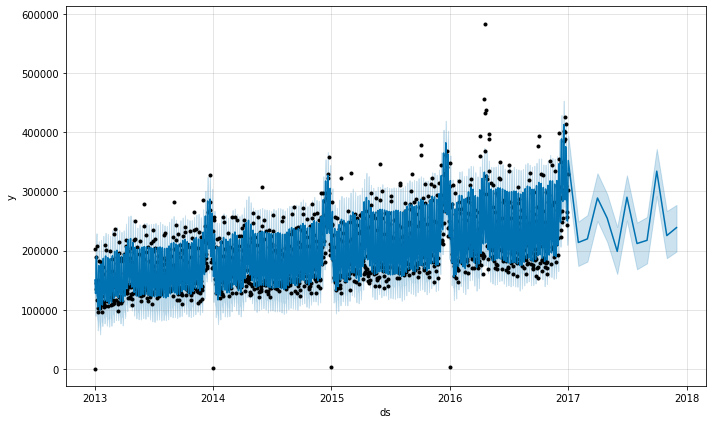

In [20]:
model_family['GROCERY I'].plot(forecast_future);

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


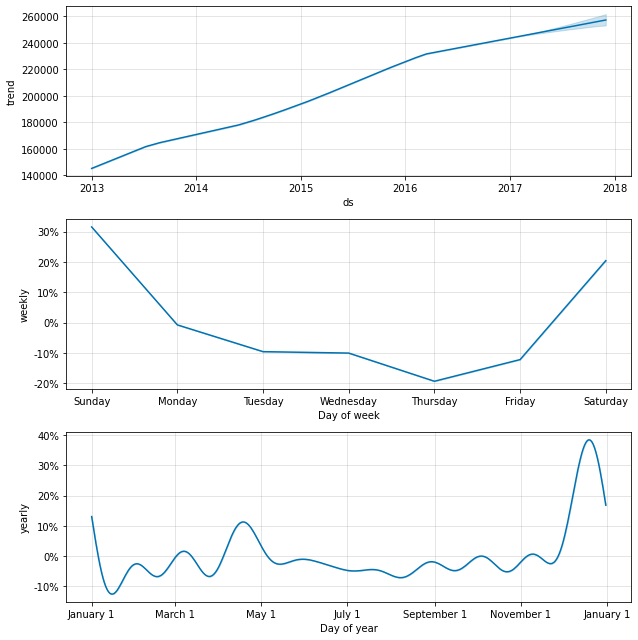

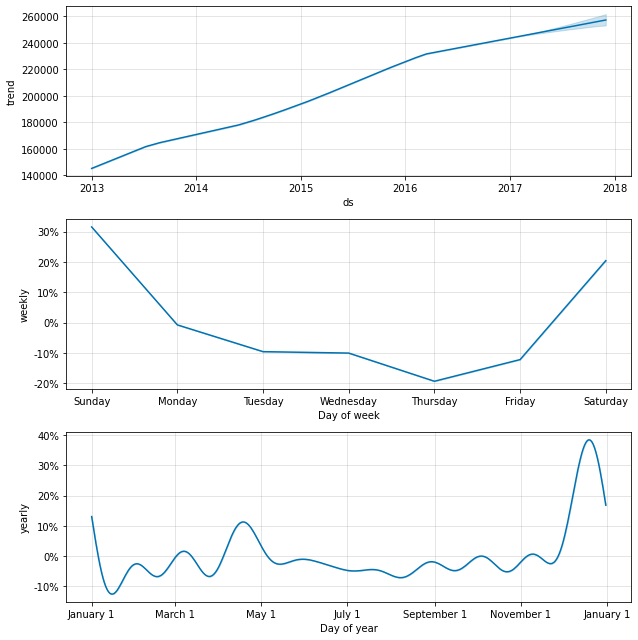

In [21]:
model_family['GROCERY I'].plot_components(fcst=forecast_future)

# Creating the model for Store

## Creating the model

In [22]:
sales_and_stores

,ds,store_nbr,family,y
0,2013-01-01,1,AUTOMOTIVE,0.000
1,2013-01-01,1,BABY CARE,0.000
2,2013-01-01,1,BEAUTY,0.000
3,2013-01-01,1,BEVERAGES,0.000
4,2013-01-01,1,BOOKS,0.000
...,...,...,...,...
2596369,2016-12-31,9,POULTRY,687.853
2596370,2016-12-31,9,PREPARED FOODS,100.405
2596371,2016-12-31,9,PRODUCE,3091.356
2596372,2016-12-31,9,SCHOOL AND OFFICE SUPPLIES,2.000


In [24]:
%%time
def store(sales_and_stores):

    forecasts = {}
    for store in sales_and_stores['store_nbr'].unique():
        
        print(store)
        
        # creating a new variable
        tmp_df_prep = sales_and_stores[sales_and_stores['store_nbr']== store]
        
        # Transforming the column in date time
        tmp_df_prep['ds'] = pd.to_datetime(tmp_df_prep['ds'])
 
        # creating a temporary df to the the training and prediction
        tmp_df = tmp_df_prep.groupby(by='ds').sum().reset_index()
        
        
        # defining the train/test 
        train = tmp_df.iloc[:1457]
        test = tmp_df.iloc[1458:]
        
        
        # Instantiating the FB Prophet model
        model = Prophet(seasonality_mode='multiplicative')

        # fitting the model on the train test
        model.fit(train)
        
        forecasts[store]= model
    
    return forecasts

model_store = store(sales_and_stores)


<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


1
10
Initial log joint probability = -26.23
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


      99       2948.44     0.0185729       144.056           1           1      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     112       2949.31   0.000227953       101.075   2.863e-06       0.001      173  LS failed, Hessian reset 
     199       2950.21     0.0046252         62.69      0.3181           1      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     223       2950.64    0.00196353       142.748   2.499e-05       0.001      359  LS failed, Hessian reset 
     299       2951.33    0.00670235       68.9742           1           1      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2951.62   0.000139393       73.1952           1           1      584   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       2951.63   1.00349e-05        46.508      0.9323

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.8819
11
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3634.89    0.00107443       124.238           1           1      128   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     147        3635.8   0.000106154       127.387   8.932e-07       0.001      237  LS failed, Hessian reset 
     199       3636.09   0.000305145       61.0685      0.9143      0.9143      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     215       3636.21   7.01788e-05        82.886   6.413e-07       0.001      371  LS failed, Hessian reset 
     299       3636.39   4.05078e-05       74.9833      0.3834           1      484   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     325       3636.52   0.000239321       192.389   2.625e-06       0.001      569  LS failed, Hessian r

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


12
      99       2878.38    0.00224485       99.1235      0.9692      0.9692      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     197       2879.26   3.71695e-05       98.5764   4.919e-07       0.001      301  LS failed, Hessian reset 
     199       2879.27   1.65655e-05       79.9906      0.7388      0.7388      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     241       2879.27   1.19162e-07       75.3285      0.2134      0.6483      361   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


13
Initial log joint probability = -16.4949
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2948.8     0.0107952        302.77           1           1      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     188       2951.86   0.000311039       129.567   1.653e-06       0.001      284  LS failed, Hessian reset 
     199       2953.32    0.00112504       62.3126      0.4574      0.4574      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234       2953.71   0.000244813       114.182   1.754e-06       0.001      387  LS failed, Hessian reset 
     299       2953.93   9.86632e-05       62.9971      0.4624      0.4624      462   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       2954.54    0.00413755       153.395   3.898e-05       0.001      518  LS failed, Hessian r

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     62.6369      0.6413           1      597   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -29.3837
15
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2797.56    0.00143315       137.613      0.5381      0.5381      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       2799.18   0.000449593       148.876   2.807e-06       0.001      206  LS failed, Hessian reset 
     196       2800.32    0.00200885       276.897   1.737e-05       0.001      321  LS failed, Hessian reset 
     199       2800.39   0.000394794       79.6629           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     266       2800.67   0.000271975       84.2288   3.324e-06       0.001      454  LS failed, Hessian reset 
     299       2800.69   3.70848e-05       72.8324           1           1      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -22.8523
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3191    0.00679696       126.191      0.8369      0.8369      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3193.11    0.00133719       104.138      0.5028           1      267   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     216       3193.29    0.00135294       172.365   1.198e-05       0.001      320  LS failed, Hessian reset 
     234       3193.36   0.000257955       68.4327   3.368e-06       0.001      375  LS failed, Hessian reset 
     299       3193.38    2.9574e-06       67.1157           1           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     338        3193.4   9.72193e-05       79.7752   1.083e-06       0.001      561  LS failed, Hessian rese

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


17
Initial log joint probability = -36.6937
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3005.67   0.000210983       72.6701           1           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     140       3007.25    0.00271163       248.631   2.517e-05       0.001      215  LS failed, Hessian reset 
     199       3007.62   0.000414183       68.4494      0.7216      0.7216      294   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     248       3008.12   0.000549829       194.904   5.415e-06       0.001      382  LS failed, Hessian reset 
     299       3008.44   5.48652e-06       75.7592      0.8792      0.8792      452   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     315       3008.45   3.41671e-05       81.1595   4.264e-07       0.001      513  LS failed, Hessian r

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

Initial log joint probability = -23.53
19
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          2722    0.00369246       106.529      0.4083           1      121   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2729.84    0.00388412       80.7225      0.5612      0.5612      250   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2731.53    0.00527671       111.733           1           1      370   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     304       2731.63    0.00225374       115.873   2.208e-05       0.001      415  LS failed, Hessian reset 
     399       2732.52   1.09353e-06       75.0633      0.2668           1      530   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     434       2732.53   5.61342e-05   

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

20
Initial log joint probability = -3.44628
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4295.17    0.00320852       263.233           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       4296.28   4.48535e-05       123.799   4.588e-07       0.001      272  LS failed, Hessian reset 
     193       4296.37   4.24882e-05       115.704   8.148e-07       0.001      334  LS failed, Hessian reset 
     199       4296.38   5.91973e-05       71.5539           1           1      340   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     280       4296.72   3.26296e-05       82.5796   3.039e-07       0.001      479  LS failed, Hessian reset 
     299       4296.87   0.000162111       133.257      0.5591      0.5591      505   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     73.9394      0.5684      0.5684      592   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -28.2806
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3083.95     0.0228855       691.321       0.264           1      123   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3147.58    0.00523256       333.288       0.432      0.9323      247   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3171.94     0.0100301       183.576      0.3388           1      360   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     385       3177.81   0.000329127        205.64   3.002e-06       0.001      514  LS failed, Hessian reset 
     399       3178.33   0.000362611       86.7675           1  

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


 log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     857       3204.43   0.000123477       71.3102   7.768e-07       0.001     1263  LS failed, Hessian reset 
     899       3204.95   3.19982e-05       70.7262       0.358           1     1315   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     999       3205.25   2.29941e-05       67.8551           1           1     1432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    1075       3205.26   8.89823e-08        87.219      0.6369      0.6369     1525   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -15.8801
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3542.41    0.00842834        157.63           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        3566.8    0.00131995       186.096      0.3797      0.3797      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3574.31   0.000142911       155.813   7.567e-07       0.001      437  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       3578.19    0.00232327       63.1392           1           1      572   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     472       3578.43   1.58612e-07       83.1465      0.6139           1      662   
Optimization terminated normally: 
  Con

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


24
Initial log joint probability = -32.993
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2873.35    0.00197129       202.879           1           1      124   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2881.74   0.000441813       62.4004           1           1      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2881.84   1.27692e-05       65.0535           1           1      387   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       2881.91   0.000282034       92.6753   3.332e-06       0.001      502  LS failed, Hessian reset 
     399       2881.94   8.24754e-07       70.3516      0.2298    0.002298      569   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     428       2881.94   1.11488e-07  

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


  3133.51   0.000487971       181.838   6.652e-06       0.001      644  LS failed, Hessian reset 
     599       3135.31    1.4315e-05       59.7625       1.307      0.3195      770   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     609       3135.32   0.000116255       69.3161   1.644e-06       0.001      819  LS failed, Hessian reset 
     652       3135.47   0.000116165       84.9763   1.838e-06       0.001      917  LS failed, Hessian reset 
     699       3135.51   1.90045e-05       74.5827           1           1      982   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     730        3136.5   0.000196501       91.8486   8.659e-07       0.001     1066  LS failed, Hessian reset 
     781       3137.26   0.000137013       83.6828   1.315e-06       0.001     1170  LS failed, Hessian reset 
     799        3137.3   1.80306e-05       61.7613      0.8264      0.8264     1195   
    Iter     

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


26
      86       2770.04    0.00326933       162.842       3e-05       0.001      157  LS failed, Hessian reset 
      99       2770.81    0.00203163       105.156      0.4405           1      173   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     152       2773.13   0.000346117       123.508   2.527e-06       0.001      273  LS failed, Hessian reset 
     199       2774.26   8.69294e-06       65.4088      0.9203      0.9203      333   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     273       2775.18   0.000489092       154.056   4.347e-06       0.001      485  LS failed, Hessian reset 
     299       2775.86   0.000174044        55.067       0.417           1      517   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     341       2776.06   0.000280067       125.652   2.359e-06       0.001      600  LS failed, Hessian reset 
     399        

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


.98   5.24474e-07        73.196           1           1      607   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -13.4895
28
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3581.64    0.00548244       71.3729           1           1      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3587.92    0.00011205       95.2394   6.385e-07       0.001      309  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     234        3588.3   0.000222589       155.207   3.362e-06       0.001      384  LS failed, Hessian reset 
     266       3588.35   3.81568e-05       84.9424   6.043e-07       0.001      459  LS failed, Hessian reset 
     298       3588.36   1.80451e-05       75.4267   2.242e-07       0.001      542  LS failed, Hessian reset 
     299       3588.36   8.05294e-06       65.2756           1           1      543   
    Iter      log prob        ||dx||      ||grad||       alpha

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


29
      44.944   6.125e-08       0.001      632  LS failed, Hessian reset 
     374        3248.5   3.46438e-07       40.9117           1           1      649   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -30.7292


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


3
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3444.31     0.0729391       395.214       1.104     0.01104      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3467.58   0.000754092       177.548      0.1305      0.7728      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       3477.52    0.00211335       215.591           1           1      368   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       3479.45   0.000147665       96.9489    5.88e-07       0.001      457  LS failed, Hessian reset 
     399        3481.1    0.00174767       79.1287           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       3483.08    0.00430452       82.5118      0.1636      0.9471     

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


     66.6391   2.047e-06       0.001      574  LS failed, Hessian reset 
     346       2936.18   2.86736e-05       71.5483   5.437e-07       0.001      640  LS failed, Hessian reset 
     399       2936.19   7.95206e-06       65.2006       0.925       0.925      714   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     436        2936.2    1.7083e-07       56.2006   3.313e-09       0.001      813  LS failed, Hessian reset 
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
Initial log joint probability = -13.1029


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


31
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3433.81      0.018631       276.728       0.276           1      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     153       3436.56   0.000123725       78.0672   7.371e-07       0.001      243  LS failed, Hessian reset 
     199       3437.06    0.00187416       82.6766       0.409           1      306   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     219       3437.12   0.000274765       157.769   3.921e-06       0.001      366  LS failed, Hessian reset 
     255       3437.16   0.000100953       63.4389   1.284e-06       0.001      451  LS failed, Hessian reset 
     282       3437.17   8.29979e-08       56.8808      0.2178      0.2178      488   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


32
Initial log joint probability = -21.1945
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3795.09     0.0013172       81.5902      0.4915      0.4915      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     157       3798.12   6.54033e-05       82.9497   1.071e-06       0.001      256  LS failed, Hessian reset 
     199       3798.46     0.0012688       91.4031       3.862      0.3862      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     221       3798.96   7.70069e-05        78.957   4.491e-07       0.001      395  LS failed, Hessian reset 
     268       3799.35   0.000233425       125.304   2.487e-06       0.001      499  LS failed, Hessian reset 
     299       3799.36   7.96814e-07       64.2107      0.6366      0.6366      545   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

34
Initial log joint probability = -47.3036
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2976.97    0.00197144       348.274     0.06741           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       2979.03   0.000415162       176.732   2.513e-06       0.001      203  LS failed, Hessian reset 
     199       2980.93    0.00252686       104.461      0.4435      0.4435      288   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     201       2980.99   0.000364314       141.998   5.375e-06       0.001      320  LS failed, Hessian reset 
     213       2981.04   6.47083e-05       56.1399   1.177e-06       0.001      372  LS failed, Hessian reset 
     271       2981.06   2.06495e-05       63.1566    2.83e-07       0.001      491  LS failed, Hessian reset 
     299       2981.06   5.45464e-06        84.008           1

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3366.76   7.86004e-05       75.9978      0.1273      0.1273      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3367.24   0.000239838       85.0246       3.715      0.3715      261   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3367.26   7.43597e-05       82.0884    1.01e-06       0.001      317  LS failed, Hessian reset 
     264       3367.28   3.59934e-07       64.0683           1           1      384   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
35
Initial log joint probability = -5.91822
36
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       4004.71    0.00031222       127.207      0.5722           1      137   
    Iter      log pr

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

37Initial log joint probability = -34.1281
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2762.43    0.00856313       97.1255           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2769.09    0.00252675       78.7035           1           1      259   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     222       2769.37   0.000388323       129.324   4.483e-06       0.001      334  LS failed, Hessian reset 
     299       2769.65    0.00177024       81.1962           1           1      434   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2769.75   9.86214e-06       78.6313      0.3831           1      565   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     406       2769.75   1.77183e-06  

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: Settin

39
Initial log joint probability = -32.457
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2823.46    0.00186178       119.718   2.264e-05       0.001      153  LS failed, Hessian reset 
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     175       2823.99   0.000269555       90.3493   1.781e-06       0.001      295  LS failed, Hessian reset 
     199       2824.47   0.000295633       69.2128           1           1      324   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2824.51   7.40307e-05       72.5767   1.074e-06       0.001      416  LS failed, Hessian reset 
     299       2824.54   4.83294e-06       44.7123           1           1      482   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     310       2824.54   9.88383e-05        78.159   1.393e-06       0.001      54

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -3.67172
4
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        4310.8    0.00119567       101.338      0.3726           1      138   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     126       4311.39   4.82272e-05       99.7116   2.409e-07       0.001      215  LS failed, Hessian reset 
     199       4311.82   0.000170576       83.8972           1           1      313   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     293       4312.06   0.000346356       92.3869   4.754e-06       0.001      473  LS failed, Hessian reset 
     299       4312.08   6.71289e-05       61.9738      0.4979      0.4979      480   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     349       4312.24   2.28341e-05       61.4678   3.198e-07       0.001      591  LS failed, Hessian re

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.108
40
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      90       2940.98   0.000429597       143.394   5.763e-06       0.001      152  LS failed, Hessian reset 
      99       2941.53    0.00180554       60.8084           1           1      162   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2943.72    0.00102988       86.8822      0.3784      0.3784      291   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211          2944   0.000244745       97.3602   1.443e-06       0.001      350  LS failed, Hessian reset 
     259       2944.42   0.000296301       65.5303   4.209e-06       0.001      451  LS failed, Hessian reset 
     299       2944.46    0.00143066       58.3779           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  No

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INF

Initial log joint probability = -12.4075
41
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      92       3266.46    0.00046225       215.053   4.321e-06       0.001      146  LS failed, Hessian reset 
      99       3266.79    0.00102668       200.624      0.5641           1      154   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     146       3267.61   0.000615051       225.934   6.731e-06       0.001      243  LS failed, Hessian reset 
     199       3267.99   4.00667e-05       74.3976           1           1      307   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     272       3268.11    0.00010194       72.5481   1.395e-06       0.001      431  LS failed, Hessian reset 
     299       3268.14   1.02778e-05       61.7949     0.04615           1      465   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.3642
42
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3251.6     0.0048219       203.215           1           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     158       3253.71   0.000376529       180.737   4.052e-06       0.001      259  LS failed, Hessian reset 
     199       3254.49   0.000161389       78.6456       0.228           1      311   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     218       3254.53   0.000413063       101.056   6.297e-06       0.001      367  LS failed, Hessian reset 
     277       3254.55   2.44658e-05       82.3739   3.056e-07       0.001      493  LS failed, Hessian reset 
     299       3254.55   6.75212e-07       70.3801       1.142       0.439      525   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  N

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INF

43
Initial log joint probability = -51.516
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2836.33     0.0505744       265.253      0.1103           1      132   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2874.81    0.00589713       229.378           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     246       2882.44    0.00358304       165.187   2.925e-05       0.001      357  LS failed, Hessian reset 
     299       2885.68    0.00625719         157.2           1           1      416   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     326        2890.4   0.000444367       183.033   3.875e-06       0.001      482  LS failed, Hessian reset 
     399       2897.79    0.00277996       93.6749           1           1      574   
    Iter      log p

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -53.1211
44
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3051.3   0.000452164       138.983       0.315       0.315      129   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3056.61   0.000181918       72.0335           1           1      254   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299        3056.9   0.000120204        83.615      0.6602      0.6602      379   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     318       3056.94   3.15383e-05       90.8003   4.197e-07       0.001      460  LS failed, Hessian reset 
     399       3057.02   2.19908e-05       58.2879           1           1      556   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     418       3057.02   1.27875e-05 

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -26.8181
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2859.67    0.00337807        96.102           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2861.93   0.000983638       60.6152           1           1      257   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     236       2862.55     0.0002775       112.614   1.837e-06       0.001      339  LS failed, Hessian reset 
     288        2863.2   1.83903e-05       54.4954   3.369e-07       0.001      439  LS failed, Hessian reset 
     299        2863.2   3.66208e-06       68.6347      0.2146      0.2146      455   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     348       2863.28   0.000152643       53.8854   1.913e-06       0.001      568  LS failed, Hessian rese

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


46
Initial log joint probability = -14.6819
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3396.28    0.00611094       220.418       0.783       0.783      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     181       3399.07   0.000104818       84.9537   1.298e-06       0.001      277  LS failed, Hessian reset 
     199       3399.18   0.000265235       47.2447      0.1874           1      303   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     212       3399.23   0.000111056        103.92   1.426e-06       0.001      360  LS failed, Hessian reset 
     231       3399.31   0.000113012       73.5851   2.858e-06       0.001      416  LS failed, Hessian reset 
     262        3399.4   0.000746176       90.7921   1.198e-05       0.001      498  LS failed, Hessian reset 
     299       3399.47   0.000422601       54.9394           1

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -32.2645
47
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2851.79    0.00110281       107.028      0.6375      0.6375      120   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     129       2852.85   0.000426537       107.411   5.533e-06       0.001      198  LS failed, Hessian reset 
     199       2853.04   7.48006e-07       64.0719       0.492       0.492      292   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     229       2853.04   7.15405e-06       78.0534   7.617e-08       0.001      378  LS failed, Hessian reset 
     238       2853.04   1.70043e-07       65.1648     0.01645           1      391   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.6404
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2926.76     0.0166894       191.344           1           1      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     136       2927.98    0.00231928       102.589   4.034e-05       0.001      215  LS failed, Hessian reset 
     199        2928.2   0.000385447       68.8926      0.8757      0.8757      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2928.73   1.12827e-05       72.2688           1           1      432   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     362       2929.13   0.000926691       108.058    1.63e-05       0.001      553  LS failed, Hessian reset 
     399       2929.35   0.000327718       66.0569           1           1      596   
    Iter      log pro

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


49
Initial log joint probability = -28.4598
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        2922.5   0.000313986        99.583      0.1463      0.1463      127   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       2922.78    5.9757e-05       62.3174   9.187e-07       0.001      221  LS failed, Hessian reset 
     174        2922.8   8.29542e-05       65.3215   9.945e-07       0.001      316  LS failed, Hessian reset 
     194       2922.81   2.64701e-06       61.2217   5.715e-08       0.001      384  LS failed, Hessian reset 
     199       2922.81   4.89246e-07       41.9101      0.7144      0.7144      390   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     208       2922.81   1.44953e-08       45.9824     0.06691           1      406   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -18.3313
5
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2939.71     0.0108171       108.192      0.4514      0.4514      122   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199        2942.3   0.000400333       72.2993      0.5428      0.5428      256   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     211       2942.63   0.000249136       101.392   1.819e-06       0.001      304  LS failed, Hessian reset 
     274          2943   0.000153819       74.0426   1.795e-06       0.001      427  LS failed, Hessian reset 
     299       2943.02   0.000160364         63.31           1           1      458   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     355       2943.06   2.41036e-05       79.4094   3.564e-07       0.001      579  LS failed, Hessian re

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -30.4939
50
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3038.67    0.00154949        83.225      0.4406      0.4406      117   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     133       3040.35   0.000381465       91.2867   1.147e-06       0.001      209  LS failed, Hessian reset 
     199       3041.64   2.95787e-05       82.9972      0.6018      0.6018      296   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3041.81   0.000554775       191.067   5.095e-06       0.001      370  LS failed, Hessian reset 
     299       3041.93   3.97213e-06        70.951       0.551       0.551      460   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     313       3041.94   3.06641e-05       65.2528   4.095e-07       0.001      520  LS failed, Hessian r

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


51
Initial log joint probability = -28.0437
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      91       3041.69   0.000246343        118.28   2.155e-06       0.001      148  LS failed, Hessian reset 
      99       3042.79    0.00113773       78.9894      0.2975      0.8882      158   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     150       3044.22   0.000568661       233.174   3.408e-06       0.001      272  LS failed, Hessian reset 
     199       3044.71   6.55059e-06       57.5201      0.3518      0.3518      342   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3044.71   4.02367e-06       67.4679   7.332e-08       0.001      421  LS failed, Hessian reset 
     251       3044.71   1.51958e-07       67.8546      0.2594      0.2594      446   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INF

Initial log joint probability = -28.6711
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      77       2813.38   0.000321304       107.795   2.833e-06       0.001      144  LS failed, Hessian reset 
      99       2813.92   7.90403e-05       54.1492           1           1      180   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     122        2814.2   0.000224406       73.6986   2.055e-06       0.001      252  LS failed, Hessian reset 
     199        2814.7   5.49364e-05       58.3852      0.3671      0.3671      356   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     238       2814.78    3.6809e-07       51.7767           1           1      417   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance
52


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


53


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


54
Initial log joint probability = -60.6334
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99        3148.9    0.00194424       224.899      0.2537      0.2537      131   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       3173.27     0.0174053       246.761       5.096      0.5096      258   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     225       3174.55   0.000149806       105.288   1.257e-06       0.001      330  LS failed, Hessian reset 
     299        3176.7    0.00616204       87.4399           1           1      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     330       3178.38   0.000489669       199.651   5.401e-06       0.001      511  LS failed, Hessian reset 
     399       3178.93   0.000153342       74.4356      0.2786           1      602   
    Iter      log 

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.9905
6
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       3304.49   0.000343943       244.858      0.3759      0.3759      146   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     141       3306.81   0.000211654       128.113   9.643e-07       0.001      249  LS failed, Hessian reset 
     199       3308.42   0.000181264       66.5818           1           1      326   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     231       3309.24    0.00165787       354.108   1.178e-05       0.001      406  LS failed, Hessian reset 
     299       3310.16   5.15916e-06       78.9649           1           1      500   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     312       3310.18   0.000273757       99.6825    3.91e-06       0.001      562  LS failed, Hessian re

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.7664
7
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99          3102    0.00400701       168.294      0.1206      0.8132      125   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     145       3104.73   0.000200417        77.424   1.062e-06       0.001      228  LS failed, Hessian reset 
     199       3105.61   0.000367104       50.2269           1           1      298   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     228       3105.96    0.00035497       139.022   6.286e-06       0.001      373  LS failed, Hessian reset 
     275       3106.15   7.77217e-05       66.0245   9.988e-07       0.001      481  LS failed, Hessian reset 
     285       3106.16   1.27356e-05       63.2734   2.166e-07       0.001      531  LS failed, Hessian reset 
     299       3106.16   5.11476e-06       55.3533      0.4437 

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -28.8411
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2928.82   0.000741318       87.3668           1           1      126   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       2935.96   0.000504111       66.6514           1           1      263   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     207       2936.09   0.000187449       80.8429   1.991e-06       0.001      315  LS failed, Hessian reset 
     289       2936.65   0.000319844       124.681   4.115e-06       0.001      462  LS failed, Hessian reset 
     299       2936.93   0.000474439        70.055      0.9288      0.9288      472   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     336       2937.05   8.26346e-05       73.4278   1.247e-06       0.001      567  LS failed, Hessian rese

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -27.5919
9
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2870.43    0.00269025       57.8249           1           1      135   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     127       2871.78   0.000675695       204.085   7.269e-06       0.001      207  LS failed, Hessian reset 
     199       2873.42   0.000252428       70.9671      0.3516      0.3516      301   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     224       2873.73    0.00458446       219.254   9.244e-05       0.001      371  LS failed, Hessian reset 
     261          2874   0.000225156       102.929   3.373e-06       0.001      453  LS failed, Hessian reset 
     299       2874.04   0.000111745       77.7327           1           1      503   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  No

<timed exec>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -23.8448
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       2940.22    0.00231741        107.51           1           1      139   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     106       2940.52   0.000216086       86.0131   1.809e-06       0.001      180  LS failed, Hessian reset 
     199       2942.43   2.36482e-05       81.5199           1           1      297   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       2942.58   5.74601e-07       69.8324     0.08375           1      429   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       2942.61   1.76073e-06       74.2038       1.447      0.1447      548   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     413       2942.61   3.67658e-07    

In [25]:
model_store

{1: <fbprophet.forecaster.Prophet at 0x7f6719df1430>,
 10: <fbprophet.forecaster.Prophet at 0x7f6746f58790>,
 11: <fbprophet.forecaster.Prophet at 0x7f6746f615e0>,
 12: <fbprophet.forecaster.Prophet at 0x7f66ec1d78b0>,
 13: <fbprophet.forecaster.Prophet at 0x7f6746f6c160>,
 14: <fbprophet.forecaster.Prophet at 0x7f6746f761f0>,
 15: <fbprophet.forecaster.Prophet at 0x7f6746f7b190>,
 16: <fbprophet.forecaster.Prophet at 0x7f6746f82910>,
 17: <fbprophet.forecaster.Prophet at 0x7f6746f87490>,
 18: <fbprophet.forecaster.Prophet at 0x7f67454621c0>,
 19: <fbprophet.forecaster.Prophet at 0x7f67454629a0>,
 2: <fbprophet.forecaster.Prophet at 0x7f6745465e50>,
 20: <fbprophet.forecaster.Prophet at 0x7f6745469f40>,
 21: <fbprophet.forecaster.Prophet at 0x7f674546da90>,
 22: <fbprophet.forecaster.Prophet at 0x7f674545a3a0>,
 23: <fbprophet.forecaster.Prophet at 0x7f6742798730>,
 24: <fbprophet.forecaster.Prophet at 0x7f67427a14f0>,
 25: <fbprophet.forecaster.Prophet at 0x7f67427a82e0>,
 26: <fbprop

## Making prediction with a specific family

In [26]:
future_store = model_store[9].make_future_dataframe(periods=12, freq='MS')  #period of 12 months
forecast_future_store = model_store[9].predict(future_store)
forecast_future_store.head()


/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2013-01-01,9916.932754,6237.739911,14930.592805,9916.932754,9916.932754,0.053771,0.053771,0.053771,-0.055231,-0.055231,-0.055231,0.109002,0.109002,0.109002,0.0,0.0,0.0,10450.179637
1,2013-01-02,9924.395371,4959.825916,13399.620572,9924.395371,9924.395371,-0.085812,-0.085812,-0.085812,-0.173717,-0.173717,-0.173717,0.087906,0.087906,0.087906,0.0,0.0,0.0,9072.767830
2,2013-01-03,9931.857988,4672.154622,13137.004326,9931.857988,9931.857988,-0.101136,-0.101136,-0.101136,-0.168332,-0.168332,-0.168332,0.067196,0.067196,0.067196,0.0,0.0,0.0,8927.386480
3,2013-01-04,9939.320605,3759.541791,12033.408301,9939.320605,9939.320605,-0.198427,-0.198427,-0.198427,-0.245607,-0.245607,-0.245607,0.047179,0.047179,0.047179,0.0,0.0,0.0,7967.086892
4,2013-01-05,9946.783222,8426.306351,16522.785843,9946.783222,9946.783222,0.251946,0.251946,0.251946,0.223809,0.223809,0.223809,0.028138,0.028138,0.028138,0.0,0.0,0.0,12452.839634


## Plotting the specific store prediction

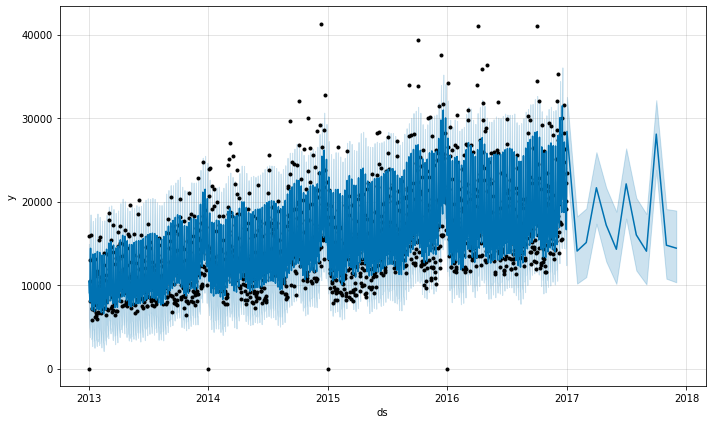

In [27]:
model_store[9].plot(forecast_future_store);

/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/root/.pyenv/versions/3.8.12/envs/business_case_869/lib/python3.8/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


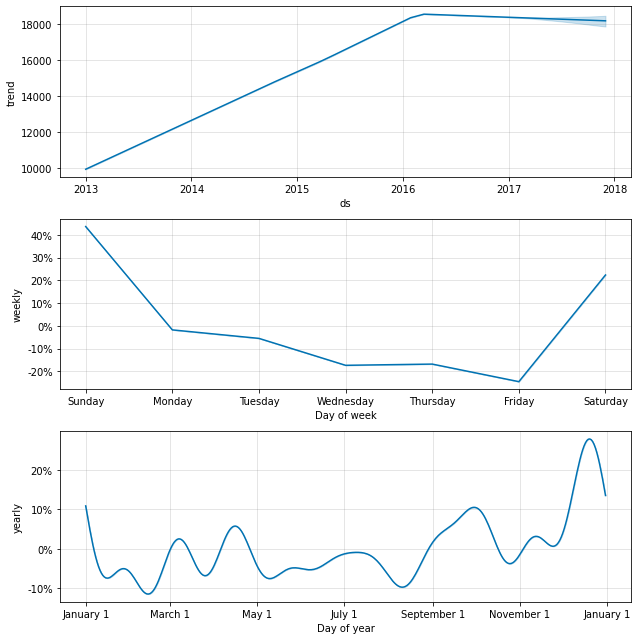

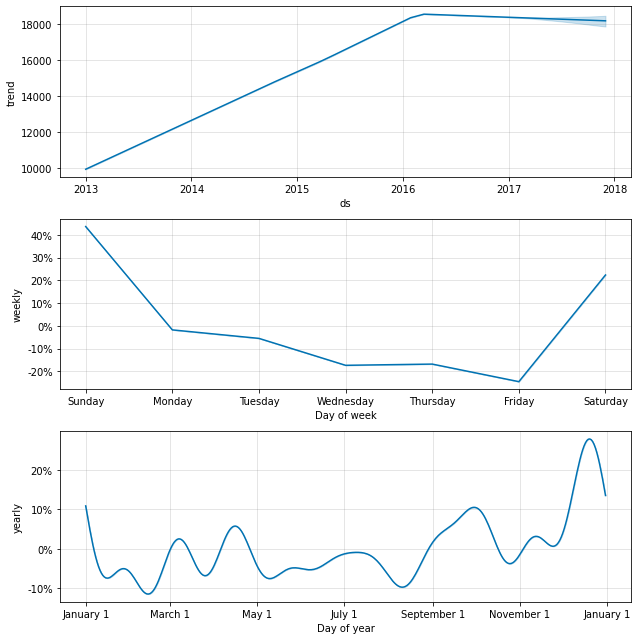

In [28]:
model_store[9].plot_components(fcst=forecast_future_store)

# Auxiliar graphs and backup

In [10]:
plt.figure(figsize=(20,20))
for category in forecasts_df.columns:
    plt.plot(forecasts_df[category], label=category)
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1))

NameError: name 'forecasts_df' is not defined

<Figure size 1440x1440 with 0 Axes>

In [ ]:
plt.figure(figsize=(20,20))
for category in forecasts_df.columns:
    if category in ('AUTOMOTIVE', 'GROCERY I', 'BEVERAGES', 'PRODUCE'):
        pass
    else:
        plt.plot(forecasts_df[category], label=category)
plt.legend(loc='upper right', bbox_to_anchor=(1.27, 1))

In [ ]:
"""BACKUP"""

# def family(sales_and_stores):

#     forecasts = {}
#     for category in sales_and_stores['family'].unique():
#         print(category)
#         # creating a new variable
#         tmp_df_prep = sales_and_stores[sales_and_stores['family']== category]
        
#         # Transforming the column in date time
#         tmp_df_prep['ds'] = pd.to_datetime(tmp_df_prep['ds'])
 
#         # creating a temporary df to the the training and prediction
#         tmp_df = tmp_df_prep.groupby(by='ds').sum().drop(columns=["store_nbr", "onpromotion"]).reset_index()
        
        
#         # defining the train/test 
#         train = tmp_df.iloc[:1457]
#         test = tmp_df.iloc[1458:]
        
        
#         # Instantiating the FB Prophet model
#         model = Prophet(seasonality_mode='multiplicative')

#         # fitting the model on the train test
#         model.fit(train)
        
# # CREATE A NEW FUNCTION TO SAVE 

#         # Making a prediction on the test set
#         forecast_test = model.predict(test)
#         forecast_test.head()

#         #plotting the test forecast
#         #model.plot(forecast_test)

#         # making a future prediction
#         future = model.make_future_dataframe(periods=12, freq='MS')  #period of 12 months
#         forecast_future = model.predict(future)
#         forecast_future.head()

#         # ploting the prediction
#         #model.plot(forecast_future)

#         # plotting the combination of analysis inside FB Prophet
#         #model.plot_components(fcst=forecast_future)

#         forecasts[category]= list(forecast_future['yhat'])
    
#     return forecasts

